In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

# Na razie -> robię tak jak poprzednio wszystko

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)

image_size = X_train.shape[1]
X_train = np.reshape(X_train,[-1,image_size,image_size,1])
X_test = np.reshape(X_test,[-1,image_size,image_size,1])

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [3]:
input_shape = (image_size,image_size,1)
batch_size = 32
kernel_size = 3
n_filters = 32
dropout = 0.4

### Lewa gałąź 

In [4]:
left_inputs = Input(shape=input_shape)
x = left_inputs
filters = n_filters
for i in range(3):
    x = Conv2D(filters = filters,
              kernel_size=kernel_size,
              padding='same',
              activation='relu')(x)
    x = Dropout(dropout)(x)
    x = MaxPooling2D()(x)
    filters *= 2

### Prawa gałąź 

In [5]:
right_inputs = Input(shape=input_shape)
y = right_inputs
filters = n_filters
for i in range(3):
    y = Conv2D(filters = filters,
              kernel_size=kernel_size,
              padding='same',
              activation='relu')(y)
    y = Dropout(dropout)(y)
    y = MaxPooling2D()(y)
    filters *= 2

### Konktanecja gałęzi i ich spłaszczanie 

In [6]:
y = concatenate([x,y])

In [9]:
y = Flatten()(y)
y = Dropout(dropout)(y)
outputs = Dense(num_labels,activation='softmax')(y)

###### Funkcja Softmax jest powszechnie stosowana w warstwie wyjścia sieci neuronowych do rozwiązywania problemów klasyfikacji wieloklasowej. Funkcja ta przekształca wyjście sieci neuronowej na rozkład prawdopodobieństwa, gdzie każda klasa ma swoją wartość prawdopodobieństwa, sumującą się do 1. W ten sposób funkcja ta może wygenerować wartości wyjściowe, które są interpretowalne jako prawdopodobieństwa przynależności do poszczególnych klas. 

## Konstruowanie modelu 

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 28, 28, 32)   320         ['input_2[0][0]']                
                                                                                            

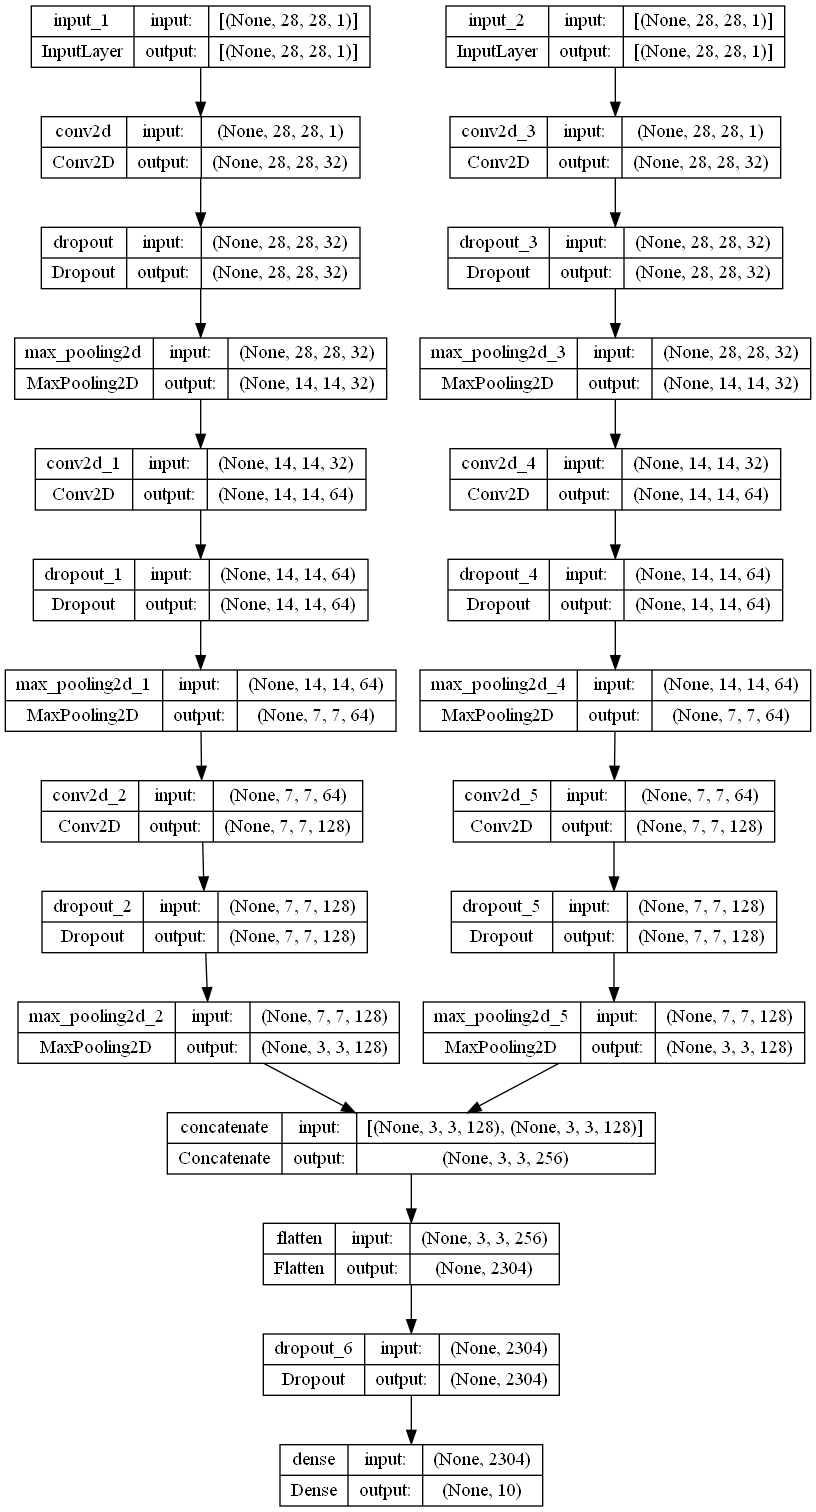

In [11]:
model = Model([left_inputs,right_inputs],outputs)
model.summary()
plot_model(model,to_file='siec-cnn-y-shaped.png',show_shapes=True)


In [12]:
model.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [13]:
model.fit([X_train,X_train],y_train,validation_data=([X_test,X_test],y_test),epochs=20,batch_size=batch_size)

Epoch 1/20
1875/1875 [==============================] - 105s 55ms/step - loss: 0.1697 - accuracy: 0.9461 - val_loss: 0.1096 - val_accuracy: 0.9882
Epoch 2/20
1875/1875 [==============================] - 120s 64ms/step - loss: 0.0670 - accuracy: 0.9787 - val_loss: 0.0977 - val_accuracy: 0.9881
Epoch 3/20
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0536 - accuracy: 0.9834 - val_loss: 0.0822 - val_accuracy: 0.9900
Epoch 4/20
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0498 - accuracy: 0.9851 - val_loss: 0.0733 - val_accuracy: 0.9924
Epoch 5/20
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0457 - accuracy: 0.9853 - val_loss: 0.0524 - val_accuracy: 0.9906
Epoch 6/20
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0413 - accuracy: 0.9871 - val_loss: 0.0399 - val_accuracy: 0.9924
Epoch 7/20
1875/1875 [==============================] - 110s 58ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0

In [15]:
#Dokładność na zbiorze testowym
_, acc = model.evaluate([X_test,X_test],y_test,batch_size = batch_size, verbose= 0)
print('\nDokładność na zbiorze testowym: %.1f%%' % (100.0 * acc))


Dokładność na zbiorze testowym: 99.4%
